## Scenario Analysis for a 100% renewable electricity system in Chile

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypsa

In [ ]:
n = pypsa.Network.import_from_netcdf()

## Investigation 

##### without a limit on CO2 emissions

In [ ]:
n.objective / 1e9

15426.5654764576

##### with a CO2 emission reduction of 100% (no emissions)

In [ ]:
sensitivity = {}

# Set CO2 limit to 0
co2_limit = 0
n.global_constraints.loc["CO2Limit", "constant"] = co2_limit * 1e6

n.optimize(solver_name="gurobi")


In [ ]:
def system_cost(n):
    tsc = n.statistics.capex() + n.statistics.opex()
    return tsc.droplevel(0).div(1e6)  # million €/a

In [ ]:

# System cost in the sensitivity limit co2 = 0
sensitivity[co2_limit] = system_cost(n)
sensitivity[co2_limit] 

carrier
Biomass                         0.000000e+00
Coal                            0.000000e+00
Gas                             0.000000e+00
Hydro                           0.000000e+00
Oil                             0.000000e+00
Petcoke                         0.000000e+00
offwind                         0.000000e+00
onwind                          2.125039e+06
solar                           6.918677e+06
HVAC                            6.154347e+05
battery storage                 3.307934e+06
hydrogen storage underground    2.459482e+06
dtype: float64

##### Sensitivity analysis: Variations of battery costs

In [ ]:
sensitivity_battery = {}

for battery_storage_cost in [0, 20, 40, 60, 80, 100]: # %
    for index, row in aggregated_regions.iterrows():
        bus=index
        n.storage_units.loc[f"{bus} battery storage", 'capital_cost'] = (battery_storage_cost/100) * costs.at["battery inverter", "capital_cost"] + 6 * costs.at["battery storage", "capital_cost"]
    n.optimize(solver_name='gurobi')
    sensitivity_battery[battery_storage_cost] = system_cost(n)
sensitivity_battery

In [ ]:
sensitivity_battery = pd.DataFrame(sensitivity_battery ) # million €/a
sensitivity_battery 

,0,20,40,60,80,100
carrier,,,,,,
Biomass,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Coal,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Gas,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Hydro,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Oil,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Petcoke,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
offwind,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
onwind,1.411010e+06,1.410571e+06,1.620805e+06,2.094136e+06,2.124376e+06,2.125039e+06
solar,7.101398e+06,7.103749e+06,7.046762e+06,6.905351e+06,6.913359e+06,6.918677e+06


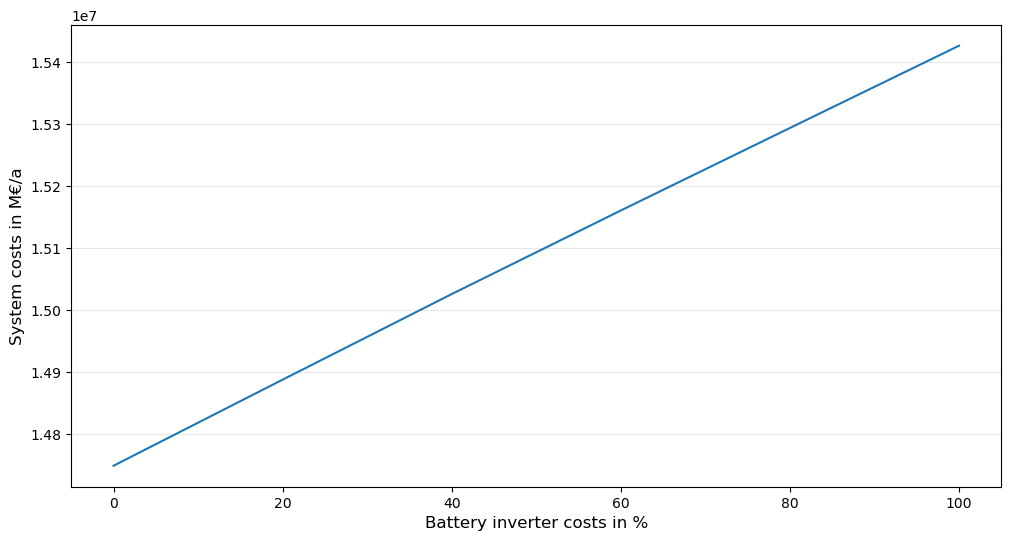

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.xlabel('Battery inverter costs in %', fontsize = 12)
plt.ylabel('System costs in M€/a', fontsize = 12)
plt.grid(alpha=0.3, axis = 'y', linewidth = 0.7)
plt.plot(sensitivity_battery.sum())

In [ ]:
def system_cost(n):
    tsc = n.statistics.capex() + n.statistics.opex()
    return tsc.droplevel(0).div(1e6)  # million €/a

In [ ]:
system_cost(n)

carrier
battery storage                 3.307934e+06
hydrogen storage underground    2.459482e+06
HVAC                            6.154347e+05
Biomass                         0.000000e+00
Coal                            0.000000e+00
Gas                             0.000000e+00
Hydro                           0.000000e+00
Oil                             0.000000e+00
Petcoke                         0.000000e+00
offwind                         0.000000e+00
onwind                          2.125039e+06
solar                           6.918677e+06
dtype: float64

##### sensitivity analysis with a CO2 emission reduction

In [ ]:
sensitivity = {}
for co2 in [150, 100, 50, 25, 0]:
    n.global_constraints.loc["CO2Limit", "constant"] = co2 * 1e6
    n.optimize(solver_name="gurobi")
    sensitivity[co2] = system_cost(n)

In [ ]:
sensitivity

{150: carrier
 battery storage                 3.307934e+06
 hydrogen storage underground    2.459482e+06
 HVAC                            6.154347e+05
 Biomass                         0.000000e+00
 Coal                            0.000000e+00
 Gas                             0.000000e+00
 Hydro                           0.000000e+00
 Oil                             0.000000e+00
 Petcoke                         0.000000e+00
 offwind                         0.000000e+00
 onwind                          2.125039e+06
 solar                           6.918677e+06
 dtype: float64,
 100: carrier
 battery storage                 3.307934e+06
 hydrogen storage underground    2.459482e+06
 HVAC                            6.154347e+05
 Biomass                         0.000000e+00
 Coal                            0.000000e+00
 Gas                             0.000000e+00
 Hydro                           0.000000e+00
 Oil                             0.000000e+00
 Petcoke                         0.

In [ ]:
df = pd.DataFrame(sensitivity).T.div(1e3)
df

carrier,battery storage,hydrogen storage underground,HVAC,Biomass,Coal,Gas,Hydro,Oil,Petcoke,offwind,onwind,solar
150,3307.934087,2459.481514,615.434741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2125.038517,6918.676616
100,3307.934087,2459.481514,615.434741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2125.038517,6918.676616
50,3307.934087,2459.481514,615.434741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2125.038517,6918.676616
25,3307.934087,2459.481514,615.434741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2125.038517,6918.676616
0,3307.934087,2459.481514,615.434741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2125.038517,6918.676616


In [ ]:
print(df.sum())

carrier
battery storage                 16539.670437
hydrogen storage underground    12297.407571
HVAC                             3077.173707
Biomass                             0.000000
Coal                                0.000000
Gas                                 0.000000
Hydro                               0.000000
Oil                                 0.000000
Petcoke                             0.000000
offwind                             0.000000
onwind                          10625.192587
solar                           34593.383080
dtype: float64


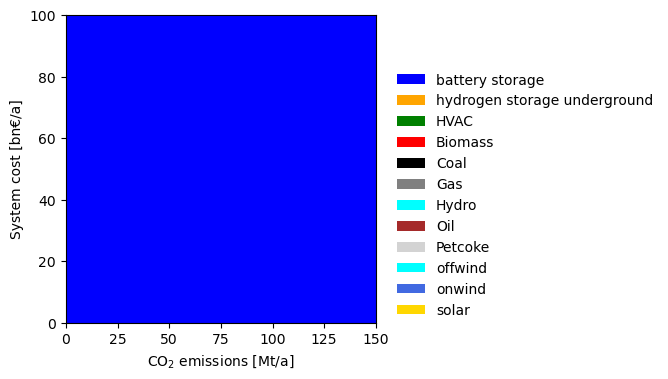

In [ ]:
color_map = {
    'battery storage': 'blue', 
    'hydrogen storage underground': 'orange',
    
    'HVAC': 'green', 
    'Biomass': 'red',
    'Coal': 'black',
    'Gas': 'grey',
    'Hydro': 'cyan',
    'Oil': 'brown',
    'Petcoke': 'lightgrey',
    'offwind': 'cyan',
    'onwind': 'royalblue',
    'solar': 'gold'
    
}

colors = df.columns.map(lambda x: color_map[x])

# Plotting the area chart
df.plot.area(
    stacked=True,
    linewidth=0,
    color=colors,
    figsize=(4, 4),
    xlim=(0, 150),
    xlabel=r"CO$_2$ emissions [Mt/a]",
    ylabel="System cost [bn€/a]",
    ylim=(0, 100),
)

# Adjust legend
plt.legend(frameon=False, loc=(1.05, 0))

# Show plot
plt.show()

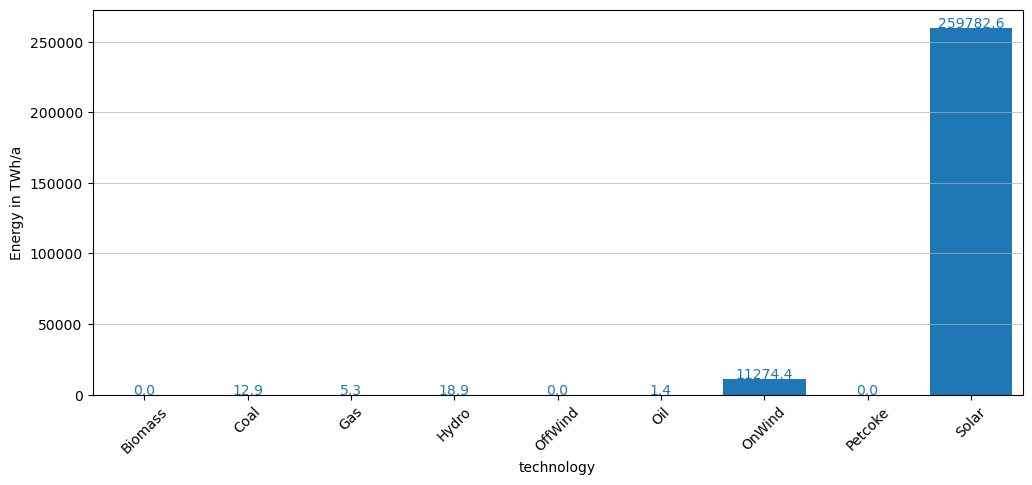

In [ ]:
# Energy mix in Chile in 2050, TWh
gen = pd.DataFrame(n.snapshot_weightings.generators @ n.generators_t.p.div(1e6)) # TWh
gen["technology"] = gen.index.str.split(" ").str[-1]
result = gen.groupby("technology").sum()
result = result['generators']

fig, ax = plt.subplots(figsize=(12,5))
result.plot.bar()
ax.set_ylabel("Energy in TWh/a")
ax.grid(alpha=0.7, axis = 'y', linewidth = 0.7)
plt.xticks(rotation=45)
bars = ax.bar(
    x=np.arange(result.size),
    height=result,
)
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bars[0].get_facecolor(),
      #weight='bold'
  )

In [ ]:
def plot_dispatch(n, time):
    
    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    
    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)
    
    fig, ax = plt.subplots(figsize=(15, 8))

    color = {
    'battery storage': 'blue', 
    'hydrogen storage underground': 'orange',
    
    'HVAC': 'green', 
    'Biomass': 'red',
    'Coal': 'black',
    'Gas': 'grey',
    'Hydro': 'cyan',
    'Oil': 'brown',
    'Petcoke': 'lightgrey',
    'offwind': 'cyan',
    'onwind': 'royalblue',
    'solar': 'gold'
    
}
    
    
    
    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=color,
    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=charge.columns.map(n.carriers.color),
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k')

    plt.legend(loc=(1.05,0))
    ax.set_ylabel("GW")
    ax.set_ylim(-10, 20)

In [ ]:
winter_dispatch = plot_dispatch(n, time="2013-7")